In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
import pickle

In [2]:
data=pd.read_excel(r'E:\datascience\final-flight.xlsx')

In [3]:
data.head()

,Unnamed: 0,Flight_Name,Departure_Time,Arrival_Time,Departure,Arrival,Route,Duration,Price,dates,Date_of_Journey
0,1,IndiGo,20:55,08:05,New Delhi,Bengaluru,1 stop via Indore,11 h 10 m,"₹ 10,028",'28/05/2022','28/05/2022'
1,2,IndiGo,18:00,00:50,New Delhi,Bengaluru,1 stop via Hyderabad,06 h 50 m,"₹ 11,729",'28/05/2022','28/05/2022'
2,3,Vistara,20:40,23:20,New Delhi,Bengaluru,Non stop,02 h 40 m,"₹ 11,730",'28/05/2022','28/05/2022'
3,4,IndiGo,22:55,01:45,New Delhi,Bengaluru,Non stop,02 h 50 m,"₹ 12,758",'28/05/2022','28/05/2022'
4,5,SpiceJet,20:00,22:30,New Delhi,Bengaluru,Non stop,02 h 30 m,"₹ 13,093",'28/05/2022','28/05/2022'


In [4]:
data.shape

(1661, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1661 entries, 0 to 1660
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1661 non-null   int64 
 1   Flight_Name      1660 non-null   object
 2   Departure_Time   1660 non-null   object
 3   Arrival_Time     1660 non-null   object
 4   Departure        1660 non-null   object
 5   Arrival          1660 non-null   object
 6   Route            1660 non-null   object
 7   Duration         1660 non-null   object
 8   Price            1660 non-null   object
 9   dates            1660 non-null   object
 10  Date_of_Journey  32 non-null     object
dtypes: int64(1), object(10)
memory usage: 142.9+ KB


In [6]:
data.describe()

,Unnamed: 0
count,1661.000000
mean,831.000000
std,479.633714
min,1.000000
25%,416.000000
50%,831.000000
75%,1246.000000
max,1661.000000


In [7]:
data.isnull().sum()

Unnamed: 0            0
Flight_Name           1
Departure_Time        1
Arrival_Time          1
Departure             1
Arrival               1
Route                 1
Duration              1
Price                 1
dates                 1
Date_of_Journey    1629
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data['Flight_Name']=data['Flight_Name'].fillna(data['Flight_Name'].mode()[0])
data['Departure_Time']=data['Departure_Time'].fillna(data['Departure_Time'].mode()[0])
data['Arrival_Time']=data['Arrival_Time'].fillna(data['Arrival_Time'].mode()[0])
data['Departure']=data['Departure'].fillna(data['Departure'].mode()[0])
data['Arrival']=data['Arrival'].fillna(data['Arrival'].mode()[0])
data['Route']=data['Route'].fillna(data['Route'].mode()[0])
data['Duration']=data['Duration'].fillna(data['Duration'].mode()[0])
data['Price']=data['Price'].fillna(data['Price'].mode()[0])
data['dates']=data['dates'].fillna(data['dates'].mode()[0])

In [10]:
data=data.drop(columns={'Unnamed: 0'})

In [11]:
data=data.drop(columns={'Date_of_Journey'})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Flight_Name     32 non-null     object
 1   Departure_Time  32 non-null     object
 2   Arrival_Time    32 non-null     object
 3   Departure       32 non-null     object
 4   Arrival         32 non-null     object
 5   Route           32 non-null     object
 6   Duration        32 non-null     object
 7   Price           32 non-null     object
 8   dates           32 non-null     object
dtypes: object(9)
memory usage: 2.5+ KB


In [13]:
data[data.duplicated()].head()

,Flight_Name,Departure_Time,Arrival_Time,Departure,Arrival,Route,Duration,Price,dates


In [14]:
data['Flight_Name'].value_counts()

IndiGo              11
Vistara              7
AirAsia              5
Air India            4
SpiceJet             2
Go First             2
SpiceJet, IndiGo     1
Name: Flight_Name, dtype: int64

In [15]:
data['Route'].value_counts()

Non stop                26
1 stop via Indore        2
1 stop via Chennai       1
1 stop via Hyderabad     1
1 stop via Raipur        1
1 stop via Nagpur        1
Name: Route, dtype: int64

In [16]:
data.replace({"IndiGo": 0, "Vistara": 1, "AirAsia": 2, "Air India": 3, "SpiceJet": 4,"Go First":5,"SpiceJet, IndiGo":6}, inplace = True)

In [17]:
data.replace({"Non stop": 0, "1 stop via Indore": 1, "1 stop via Raipur": 2, "1 stop via Hyderabad": 3, "1 stop via Chennai": 4,"1 stop via Nagpur":5}, inplace = True)

In [18]:
data.head()

,Flight_Name,Departure_Time,Arrival_Time,Departure,Arrival,Route,Duration,Price,dates
0,0,20:55,08:05,New Delhi,Bengaluru,1,11 h 10 m,"₹ 10,028",'28/05/2022'
1,0,18:00,00:50,New Delhi,Bengaluru,3,06 h 50 m,"₹ 11,729",'28/05/2022'
2,1,20:40,23:20,New Delhi,Bengaluru,0,02 h 40 m,"₹ 11,730",'28/05/2022'
3,0,22:55,01:45,New Delhi,Bengaluru,0,02 h 50 m,"₹ 12,758",'28/05/2022'
4,4,20:00,22:30,New Delhi,Bengaluru,0,02 h 30 m,"₹ 13,093",'28/05/2022'


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Flight_Name     32 non-null     int64 
 1   Departure_Time  32 non-null     object
 2   Arrival_Time    32 non-null     object
 3   Departure       32 non-null     object
 4   Arrival         32 non-null     object
 5   Route           32 non-null     int64 
 6   Duration        32 non-null     object
 7   Price           32 non-null     object
 8   dates           32 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.5+ KB


In [20]:
data['Departure_Time'].value_counts()

14:15    1
09:15    1
20:40    1
05:45    1
05:50    1
21:00    1
20:30    1
09:45    1
03:50    1
18:00    1
18:45    1
17:50    1
19:50    1
17:35    1
21:30    1
13:00    1
08:10    1
17:15    1
09:05    1
20:10    1
09:35    1
06:10    1
22:55    1
20:00    1
06:50    1
20:55    1
06:05    1
08:05    1
21:15    1
21:40    1
16:05    1
13:10    1
Name: Departure_Time, dtype: int64

In [21]:
data.dates=data.dates.str.split('/')

In [22]:
data.dates

0     ['28, 05, 2022']
1     ['28, 05, 2022']
2     ['28, 05, 2022']
3     ['28, 05, 2022']
4     ['28, 05, 2022']
5     ['28, 05, 2022']
6     ['28, 05, 2022']
7     ['28, 05, 2022']
8     ['28, 05, 2022']
9     ['28, 05, 2022']
10    ['28, 05, 2022']
11    ['28, 05, 2022']
12    ['28, 05, 2022']
13    ['28, 05, 2022']
14    ['28, 05, 2022']
15    ['28, 05, 2022']
16    ['28, 05, 2022']
17    ['28, 05, 2022']
18    ['28, 05, 2022']
19    ['28, 05, 2022']
20    ['28, 05, 2022']
21    ['28, 05, 2022']
22    ['28, 05, 2022']
23    ['28, 05, 2022']
24    ['28, 05, 2022']
25    ['28, 05, 2022']
26    ['28, 05, 2022']
27    ['28, 05, 2022']
28    ['28, 05, 2022']
29    ['28, 05, 2022']
30    ['28, 05, 2022']
31    ['28, 05, 2022']
Name: dates, dtype: object

In [23]:
data['Date']=data.dates.str[0]
data['Month']=data.dates.str[1]
data['Year']=data.dates.str[1]

In [24]:
data.Departure_Time=data.Departure_Time.str.split(':')

data['Departure_Time_Hour']=data.Departure_Time.str[0]
data['Departure_Time_Min']=data.Departure_Time.str[1]

In [25]:
data.Arrival_Time=data.Arrival_Time.str.split(':')

data['Arrival_Time_Hour']=data.Arrival_Time.str[0]
data['Arrival_Time_Min']=data.Arrival_Time.str[1]

In [26]:
data.Duration=data.Duration.str.split('')

data['Travel_hours']=data.Duration.str[0]
data['Travel_hours']=data['Travel_hours'].str.split('h')
data['Travel_hours']=data['Travel_hours'].str[0]
data.Travel_hours=data.Travel_hours

data['Travel_mins']=data.Duration.str[1]
data.Travel_mins=data.Travel_mins.str.split('m')
data.Travel_mins=data.Travel_mins.str[0]

In [31]:
data.head()

,Flight_Name,Departure_Time,Arrival_Time,Departure,Arrival,Route,Duration,Price,dates,Date,Month,Year,Departure_Time_Hour,Departure_Time_Min,Arrival_Time_Hour,Arrival_Time_Min,Travel_hours,Travel_mins
0,0,"[20, 55]","[08, 05]",New Delhi,Bengaluru,1,"[, 1, 1, , h, , 1, 0, , m, ]","₹ 10,028","['28, 05, 2022']",'28,05,05,20,55,08,05,,1
1,0,"[18, 00]","[00, 50]",New Delhi,Bengaluru,3,"[, 0, 6, , h, , 5, 0, , m, ]","₹ 11,729","['28, 05, 2022']",'28,05,05,18,00,00,50,,0
2,1,"[20, 40]","[23, 20]",New Delhi,Bengaluru,0,"[, 0, 2, , h, , 4, 0, , m, ]","₹ 11,730","['28, 05, 2022']",'28,05,05,20,40,23,20,,0
3,0,"[22, 55]","[01, 45]",New Delhi,Bengaluru,0,"[, 0, 2, , h, , 5, 0, , m, ]","₹ 12,758","['28, 05, 2022']",'28,05,05,22,55,01,45,,0
4,4,"[20, 00]","[22, 30]",New Delhi,Bengaluru,0,"[, 0, 2, , h, , 3, 0, , m, ]","₹ 13,093","['28, 05, 2022']",'28,05,05,20,00,22,30,,0


In [27]:
data.Route=data.Route.astype('int64')

In [28]:
x=data.drop(columns=['Price'])
y=data['Price']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Flight_Name


ConversionError: Failed to convert value(s) to axis units: array([list(['20', '55']), list(['18', '00']), list(['20', '40']),
       list(['22', '55']), list(['20', '00']), list(['13', '10']),
       list(['20', '10']), list(['21', '30']), list(['21', '00']),
       list(['16', '05']), list(['17', '35']), list(['19', '50']),
       list(['06', '10']), list(['06', '50']), list(['05', '45']),
       list(['08', '05']), list(['14', '15']), list(['08', '10']),
       list(['09', '35']), list(['03', '50']), list(['09', '15']),
       list(['18', '45']), list(['17', '50']), list(['06', '05']),
       list(['13', '00']), list(['09', '05']), list(['05', '50']),
       list(['20', '30']), list(['21', '40']), list(['09', '45']),
       list(['17', '15']), list(['21', '15'])], dtype=object)

<Figure size 1440x1440 with 0 Axes>

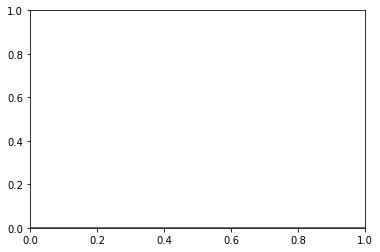

In [35]:
plt.figure(figsize=(20,20))
plotnumber=1

for i in data[1:]:
    print(i)
    plt.figure()
    plt.plot(data)
    plt.show()
        
    
plt.tight_layout()

In [30]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

ValueError: setting an array element with a sequence.